# Project 1: Rectangular Finite Quantum Well: <br> Stationary Schrödinger Equation in 1D
## 1.4 Exercises

Importing necessary libraries

In [ ]:
from math import sin, cos, sqrt
import matplotlib.pyplot as plt

## *(mandatory)*

### 1.4.1a Creating lists of values for F<sub>even</sub> ($ɛ$) and F<sub>odd</sub> ($ɛ$)

feven(E) and fodd(E) are functions returning values corresponding to even and odd solutions of the stationary Schrödinger equation in one dimension

In [ ]:
def feven(E):
    """
    Calculates the even wave function for a particle in a quantum well
    using the given energy with global parameters 'a' and 'Vo'.

    Parameters:
    -----------
    E : float
        The energy of the particle.
    Vo : float
        Potential energy of the quantum well.
    a : float
        Width of the quantum well.

    Returns:
    --------
    float
        The value of the even wave function for the given energy.
    """
    global a, Vo
    k = sqrt(2.0 * (Vo + E))
    return sin(k * a / 2.0) - cos(k * a / 2.0) * sqrt(-2.0 * E) / k


def fodd(E):
    """
    Calculates the odd wave function for a particle in a quantum well
    using the given energy with global parameters 'a' and 'Vo'.

    Parameters
    ----------
    E : float
        Energy of the particle.
    Vo : float
        Potential energy of the quantum well.
    a : float
        Width of the quantum well.

    Returns
    -------
    float
        The value of the odd wave function for the given energy.
    """
    global a, Vo
    k = sqrt(2.0 * (Vo + E))
    return sin(k * a / 2.0) + cos(k * a / 2.0) * k / sqrt(-2.0 * E)

Certain computational parameters will be changed multiple times during working with the code.<br>Thus, we will store them in a global dictionary "params".<br>The function *set_params(n, Vo)* serves as a helper function to conveniently change and update them.

In [ ]:
def set_params(n, Vo):
    """
    Set parameters for the calculation of energy levels.

    Parameters
    ----------
    n : float
        The number of steps in the quantum well.
    Vo : float
        The depth of the quantum well.

    Returns
    -------
    None

    Notes
    -----
    This function sets global parameters used in the calculation of energy
    levels in quantum well.
    """
    global params
    params = {}
    params['h'] = Vo / n
    params['dE'] = Vo / 100.0
    params['eps'] = Vo / 1000.0
    params['E1'] = -Vo + 0.00001 * Vo
    params['E2'] = params['E1'] + params['dE']

The function *get_func_values(n, Vo, h)* allows to tabulate values of even and odd functions

In [ ]:
def get_func_values(n, Vo, h):
    """
    Calculate function values for odd and even wavefunctions.

    Parameters
    ----------
    n : int
        The number of intervals.
    Vo : float
        The potential energy.
    h : float
        The step size.

    Returns
    -------
    dict
        A dictionary with keys 'energies', 'oddplot', and 'evenplot',
        and values of the corresponding arrays.
    """
    values = {'energies':[], 'oddplot':[], 'evenplot':[]}
    for i in range(1, n - 1):
        energy = -Vo + i * h
        values['energies'].append(energy)
        values['oddplot'].append(fodd(energy))
        values['evenplot'].append(feven(energy))
    return values

### Example Usage

defining basic parameters (a - well width,
Vo - barrier potential, ndiv - number of divisions):

In [ ]:
a = 2.0
Vo = 10.0
ndiv = 1000

# updating other parameters stored in the dictionary 'params'
set_params(ndiv, Vo)


Tabulating desired function values:

In [ ]:
func_values = get_func_values(ndiv, Vo, params['h'])

### 1.4.1b Visualization of the results obtained in point (a)

In [ ]:
def plot_results(values, ax_range=False):
    """
    Plots even and odd solutions to the Schrödinger equation for a given
    set of energies.

    Parameters
    ----------
    values : dict
        A dictionary containing 'energies', 'oddplot', and 'evenplot' arrays
    ax_range : bool
        If True, sets the axis range to [-0.65,-0.0,-5,3]

    Returns
    -------
    None
    """

    plt.figure(figsize=(8, 5))
    plt.plot(values['energies'], values['evenplot'], linewidth=1.5, label='even')
    plt.plot(values['energies'], values['oddplot'], linewidth=1.5, label='odd')
    plt.plot(values['energies'], [0 for i in values['energies']],
             linestyle='dashed', linewidth=0.8, color='gray')
    if ax_range:
        plt.axis([-0.65,-0.0,-5,3])
    plt.legend(fontsize=12)
    plt.xlabel("Energy [Hartree]", fontsize=12)
    plt.ylabel("Schrödinger equation solutions", fontsize=12)
    plt.show()

Example usage for the dataset obtained in point 1.1

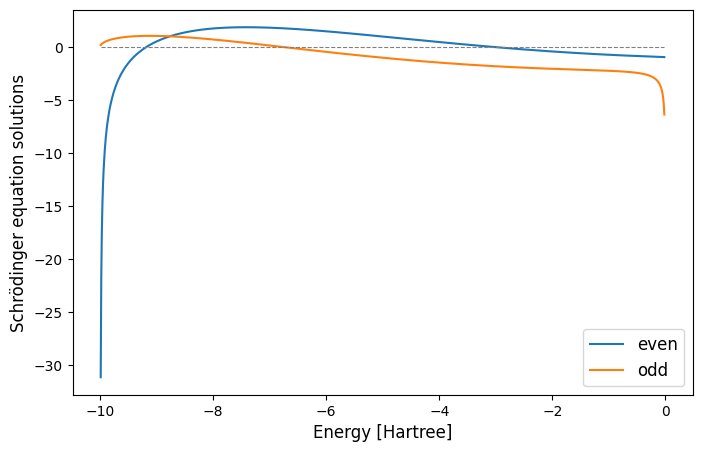

In [ ]:
plot_results(func_values)

### 1.4.2 Square finite quantum well as a model of the hydrogen atom: "Trial and Error" Method

Fitting the first two quantum well energy levels to the first two <br> energy levels in the hydrogen atom for the parameters: <br>
well width: a = 3.95 <br>
barrier potential: Vo = 0.65

In [ ]:
a = 3.95
Vo = 0.65
ndiv = 1000

# updating other parameters stored in the dictionary 'params'
set_params(ndiv, Vo)


Definitions of functions: bisection and algorithm finding zero points using it

In [ ]:
def bisection(eps, xl, xr, func):
    """
    Finds and returns a root of the given function within the specified
    tolerance using the bisection method.

    Parameters
    ----------
    xl : float
        The lower bound of the search interval.
    xr : float
        The upper bound of the search interval.
    eps : float
        The tolerance within which the root is found.
    func : function
        A Python function representing the equation whose root is to be found.
        This function should accept a single argument and return a float.

    Returns
    -------
    float
        An approximation to the root of the equation represented by the
        input function within the specified tolerance.
    """
    while xr - xl > eps:
        s = (xl + xr) / 2
        if func(s) == 0:
            return s
        elif func(xl) * func(s) < 0:
            xr = s
        else:
            xl = s
    return (xl + xr) / 2


def get_zero_points(E1, E2, eps):
    """
    Find zero points of a function within a given energy range.

    Parameters
    ----------
    E1 : float
        Lower energy limit.
    E2 : float
        Upper energy limit.
    eps : float
        Allowed error in finding the zero points.

    Returns
    -------
    list of floats
        Zero points of the function within the given energy range.

    Notes
    -----
    This function requires a global dictionary `params` containing the
    parameters of the calculations.
    """
    points = []
    while E2 < 0.0:
        if feven(E1) * feven(E2) < 0.0:
            points.append(bisection(eps, E1, E2, feven))
        if fodd(E1) * fodd(E2) < 0.0:
            points.append(bisection(eps, E1, E2, fodd))
        E1, E2 = E2, E2 + params['dE']
    return points

Tabulating values of *feven* and *fodd* functions and finding zero points

In [ ]:
func_values_2 = get_func_values(ndiv, Vo, params['h'])

zero_points = get_zero_points(params['E1'], params['E2'], params['eps'])

Presenting the results

Parameters of the well for which the result was obtained:
 a =  3.95 
Vo =  0.65
Determined energies [Hartree]:  [-0.5023216250000011, -0.1249153750000008]
Determined energies [eV]:  [-13.668673737875029, -3.3990722691250217]
Plot representing solutions of the Schrödinger equation:



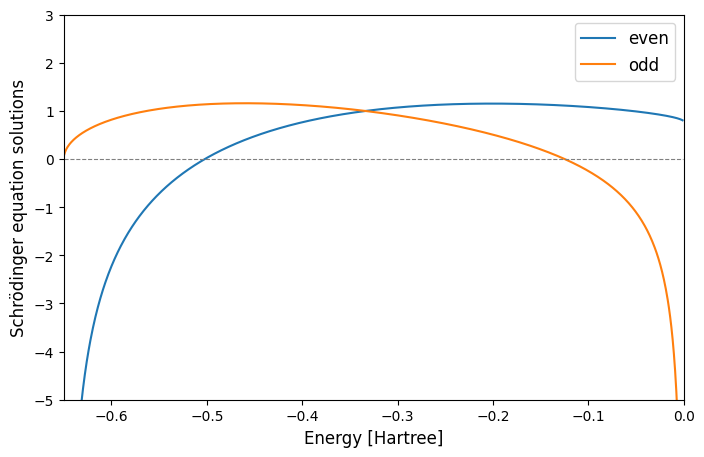

In [ ]:
print("Parameters of the well for which the result was obtained:\n a = ", a, "\nVo = ", Vo)
print("Determined energies [Hartree]: ", zero_points)
print("Determined energies [eV]: ", [x * 27.211 for x in zero_points])
print("Plot representing solutions of the Schrödinger equation:\n")
plot_results(func_values_2, True)

## *(advanced)*

### 1.4.1 Rectangular quantum well as a model of the hydrogen atom: <br> Algorithm finding well parameters for which the first two energy levels (zero points) match those in the hydrogen atom <br>
Initial values of "a" and "Vo" are set to some small value and will be gradually increased by "increment".

In [ ]:
a = 3.0
Vo = 0.2
increment = 0.05
ndiv = 1000

# updating other parameters stored in the dictionary 'params'
set_params(ndiv, Vo)

Definition of a function that automatically finds parameters of the well having two first energy levels matching (with a specified uncertainty) the energies in the hydrogen atom

In [ ]:
def find_params(incr):
    """
    Finds parameters that satisfy certain conditions by iterating over
    global variables `a` and `Vo` and calling the `get_zero_points` function.

    Parameters
    ----------
    incr : float
        The increment value for `a` and `Vo` variables.

    Returns
    -------
    None
    """
    global a, Vo
    while a < 5.0:
        Vo = 0.2
        while Vo < 2.0:
            set_params(ndiv, Vo)
            zero_pts = get_zero_points(params['E1'], params['E2'],
                                          params['eps'])
            if -0.509 < zero_pts[0] < -0.499 and -0.126 < zero_pts[1] < -0.124:
                return
            Vo += incr
        a += incr

Finding parameters of the well constituting the sought solution <br>
and determining other quantities for the found parameters

In [ ]:
find_params(increment)
set_params(ndiv, Vo)

Tabulating function values and finding zero points

In [ ]:
func_values_3 = get_func_values(ndiv, Vo, params['h'])
zero_points = get_zero_points(params['E1'], params['E2'], params['eps'])

Presenting the results

Parameters of the well for which the result was obtained:
 a =  3.9499999999999966 
Vo =  0.65

Determined energies [Hartree]:  [-0.5023216250000011, -0.1249153750000008]
Determined energies [eV]:  [-13.668673737875029, -3.3990722691250217]

Plot representing solutions of the Schrödinger equation:



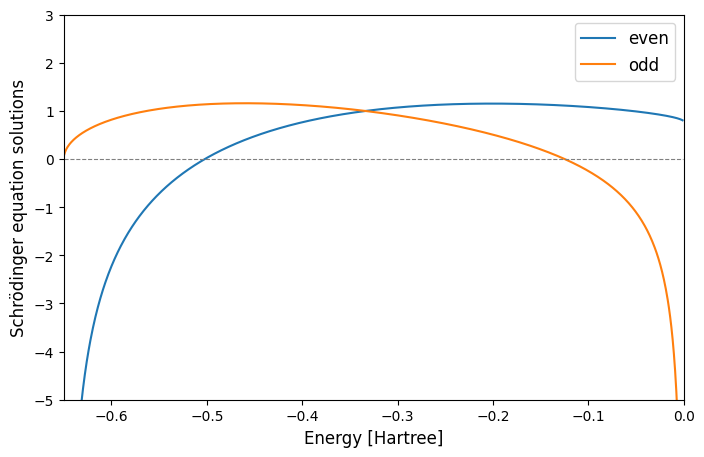

In [ ]:
print("Parameters of the well for which the result was obtained:\n a = ", a, "\nVo = ", Vo)
print("\nDetermined energies [Hartree]: ", zero_points)
print("Determined energies [eV]: ", [x * 27.211 for x in zero_points])
print("\nPlot representing solutions of the Schrödinger equation:\n")
plot_results(func_values_3, True)